In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression , LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [14]:
def reduce_num_usage(df):
    # Example: remove duplicate rows
    df = df.drop_duplicates()
    return df
cab_data = pd.read_csv('D:/cab_rides.csv')
cab_data=reduce_num_usage(cab_data)
weather_data = pd.read_csv('D:/weatherr.csv')
weather_data =reduce_num_usage(weather_data)

In [5]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [24]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier,datetime
count,693071.000000,6.930710e+05,637976.000000,693071.000000,693071
mean,2.189430,1.544046e+12,16.545125,1.013870,1970-01-01 00:25:44.045709764
min,0.020000,1.543204e+12,2.500000,1.000000,1970-01-01 00:25:43.203646318
25%,1.280000,1.543444e+12,9.000000,1.000000,1970-01-01 00:25:43.443968356
50%,2.160000,1.543737e+12,13.500000,1.000000,1970-01-01 00:25:43.737477529
75%,2.920000,1.544828e+12,22.500000,1.000000,1970-01-01 00:25:44.827508976
max,7.860000,1.545161e+12,97.500000,3.000000,1970-01-01 00:25:45.160510943
std,1.138937,6.891925e+08,9.324359,0.091641,NaN


In [12]:
cab_data.info

<bound method DataFrame.info of         distance cab_type  ...                            product_id          name
0           0.44     Lyft  ...                             lyft_line        Shared
1           0.44     Lyft  ...                          lyft_premier           Lux
2           0.44     Lyft  ...                                  lyft          Lyft
3           0.44     Lyft  ...                           lyft_luxsuv  Lux Black XL
4           0.44     Lyft  ...                             lyft_plus       Lyft XL
...          ...      ...  ...                                   ...           ...
693066      1.00     Uber  ...  6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL
693067      1.00     Uber  ...  55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX
693068      1.00     Uber  ...  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi
693069      1.00     Uber  ...  6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV
693070      1.00     Uber  ...  997acbb5-e102-41e1-b155

In [18]:
import datetime
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time']=pd.to_datetime(weather_data['time'])

In [19]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [20]:
cab_data.shape

(693071, 11)

In [21]:
weather_data.head()

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day,date_time
0,1980-01-01T00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5,235,0,1980-01-01 00:00:00
1,1980-01-01T01:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9,231,0,1980-01-01 01:00:00
2,1980-01-01T02:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5,235,1,1980-01-01 02:00:00
3,1980-01-01T03:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6,248,1,1980-01-01 03:00:00
4,1980-01-01T04:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7,265,1,1980-01-01 04:00:00


In [22]:
weather_data.shape

(389496, 18)

In [23]:
weather_data.columns

Index(['time', 'temperature', 'relative_humidity', 'dew_point',
       'precipitation (mm)', 'rain (mm)', 'snowfall (cm)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_direction', 'is_Day', 'date_time'],
      dtype='object')

In [25]:
weather_data.describe()

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day,date_time
count,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.0,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496.000000,389496
mean,24.130906,63.946035,15.233168,0.114465,0.114465,0.0,1010.373729,945.282515,35.152749,24.285045,16.730059,30.083403,1.285855,10.992143,204.201219,0.507191,2002-03-20 11:30:00.000000512
min,7.100000,6.000000,-11.800000,0.000000,0.000000,0.0,991.100000,927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1980-01-01 00:00:00
25%,21.500000,42.000000,10.200000,0.000000,0.000000,0.0,1007.300000,942.700000,0.000000,0.000000,0.000000,0.000000,0.300000,6.700000,98.000000,0.000000,1991-02-09 05:45:00
50%,23.400000,67.000000,16.100000,0.000000,0.000000,0.0,1010.500000,945.600000,16.000000,0.000000,2.000000,0.000000,0.850000,9.700000,245.000000,1.000000,2002-03-20 11:30:00
75%,27.000000,89.000000,21.100000,0.000000,0.000000,0.0,1013.600000,948.000000,75.000000,45.000000,24.000000,75.000000,1.940000,14.800000,270.000000,1.000000,2013-04-28 17:15:00
max,41.700000,100.000000,25.400000,29.500000,29.500000,0.0,1024.100000,957.300000,100.000000,100.000000,100.000000,100.000000,7.250000,43.300000,360.000000,1.000000,2024-06-06 23:00:00
std,4.996178,25.821642,6.103542,0.573517,0.573517,0.0,4.182607,3.720786,39.431550,35.525810,26.146271,40.570670,1.258055,5.795914,94.468096,0.499949,NaN


In [26]:
a=pd.concat([cab_data,weather_data])

In [27]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day,date_time
0,0.44,Lyft,1.544953e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1.543284e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1.543367e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1.543554e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1.543463e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [28]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [29]:
a.isnull().any()

distance                         True
cab_type                         True
time_stamp                       True
destination                      True
source                           True
price                            True
surge_multiplier                 True
id                               True
product_id                       True
name                             True
datetime                         True
time                             True
temperature                      True
relative_humidity                True
dew_point                        True
precipitation (mm)               True
rain (mm)                        True
snowfall (cm)                    True
pressure_msl (hPa)               True
surface_pressure (hPa)           True
cloud_cover (%)                  True
cloud_cover_low (%)              True
cloud_cover_mid (%)              True
cloud_cover_high (%)             True
vapour_pressure_deficit (kPa)    True
wind_speed_10m (km/h)            True
wind_directi

In [30]:
a.isnull().sum()

distance                         389496
cab_type                         389496
time_stamp                       389496
destination                      389496
source                           389496
price                            444591
surge_multiplier                 389496
id                               389496
product_id                       389496
name                             389496
datetime                         389496
time                             693071
temperature                      693071
relative_humidity                693071
dew_point                        693071
precipitation (mm)               693071
rain (mm)                        693071
snowfall (cm)                    693071
pressure_msl (hPa)               693071
surface_pressure (hPa)           693071
cloud_cover (%)                  693071
cloud_cover_low (%)              693071
cloud_cover_mid (%)              693071
cloud_cover_high (%)             693071
vapour_pressure_deficit (kPa)    693071


In [31]:
a.fillna(0,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4248\1902534521.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  a.fillna(0,inplace=True)


In [32]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'time',
       'temperature', 'relative_humidity', 'dew_point', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_direction', 'is_Day', 'date_time', 'day', 'hour'],
      dtype='object')

In [33]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction,is_Day,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496,389496
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<Axes: xlabel='cab_type'>

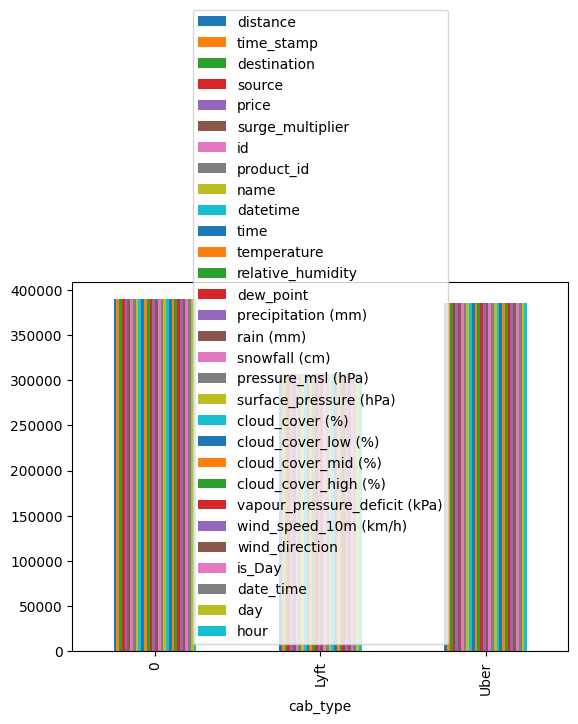

In [34]:
a.groupby('cab_type').count().plot.bar()

<Axes: xlabel='price'>

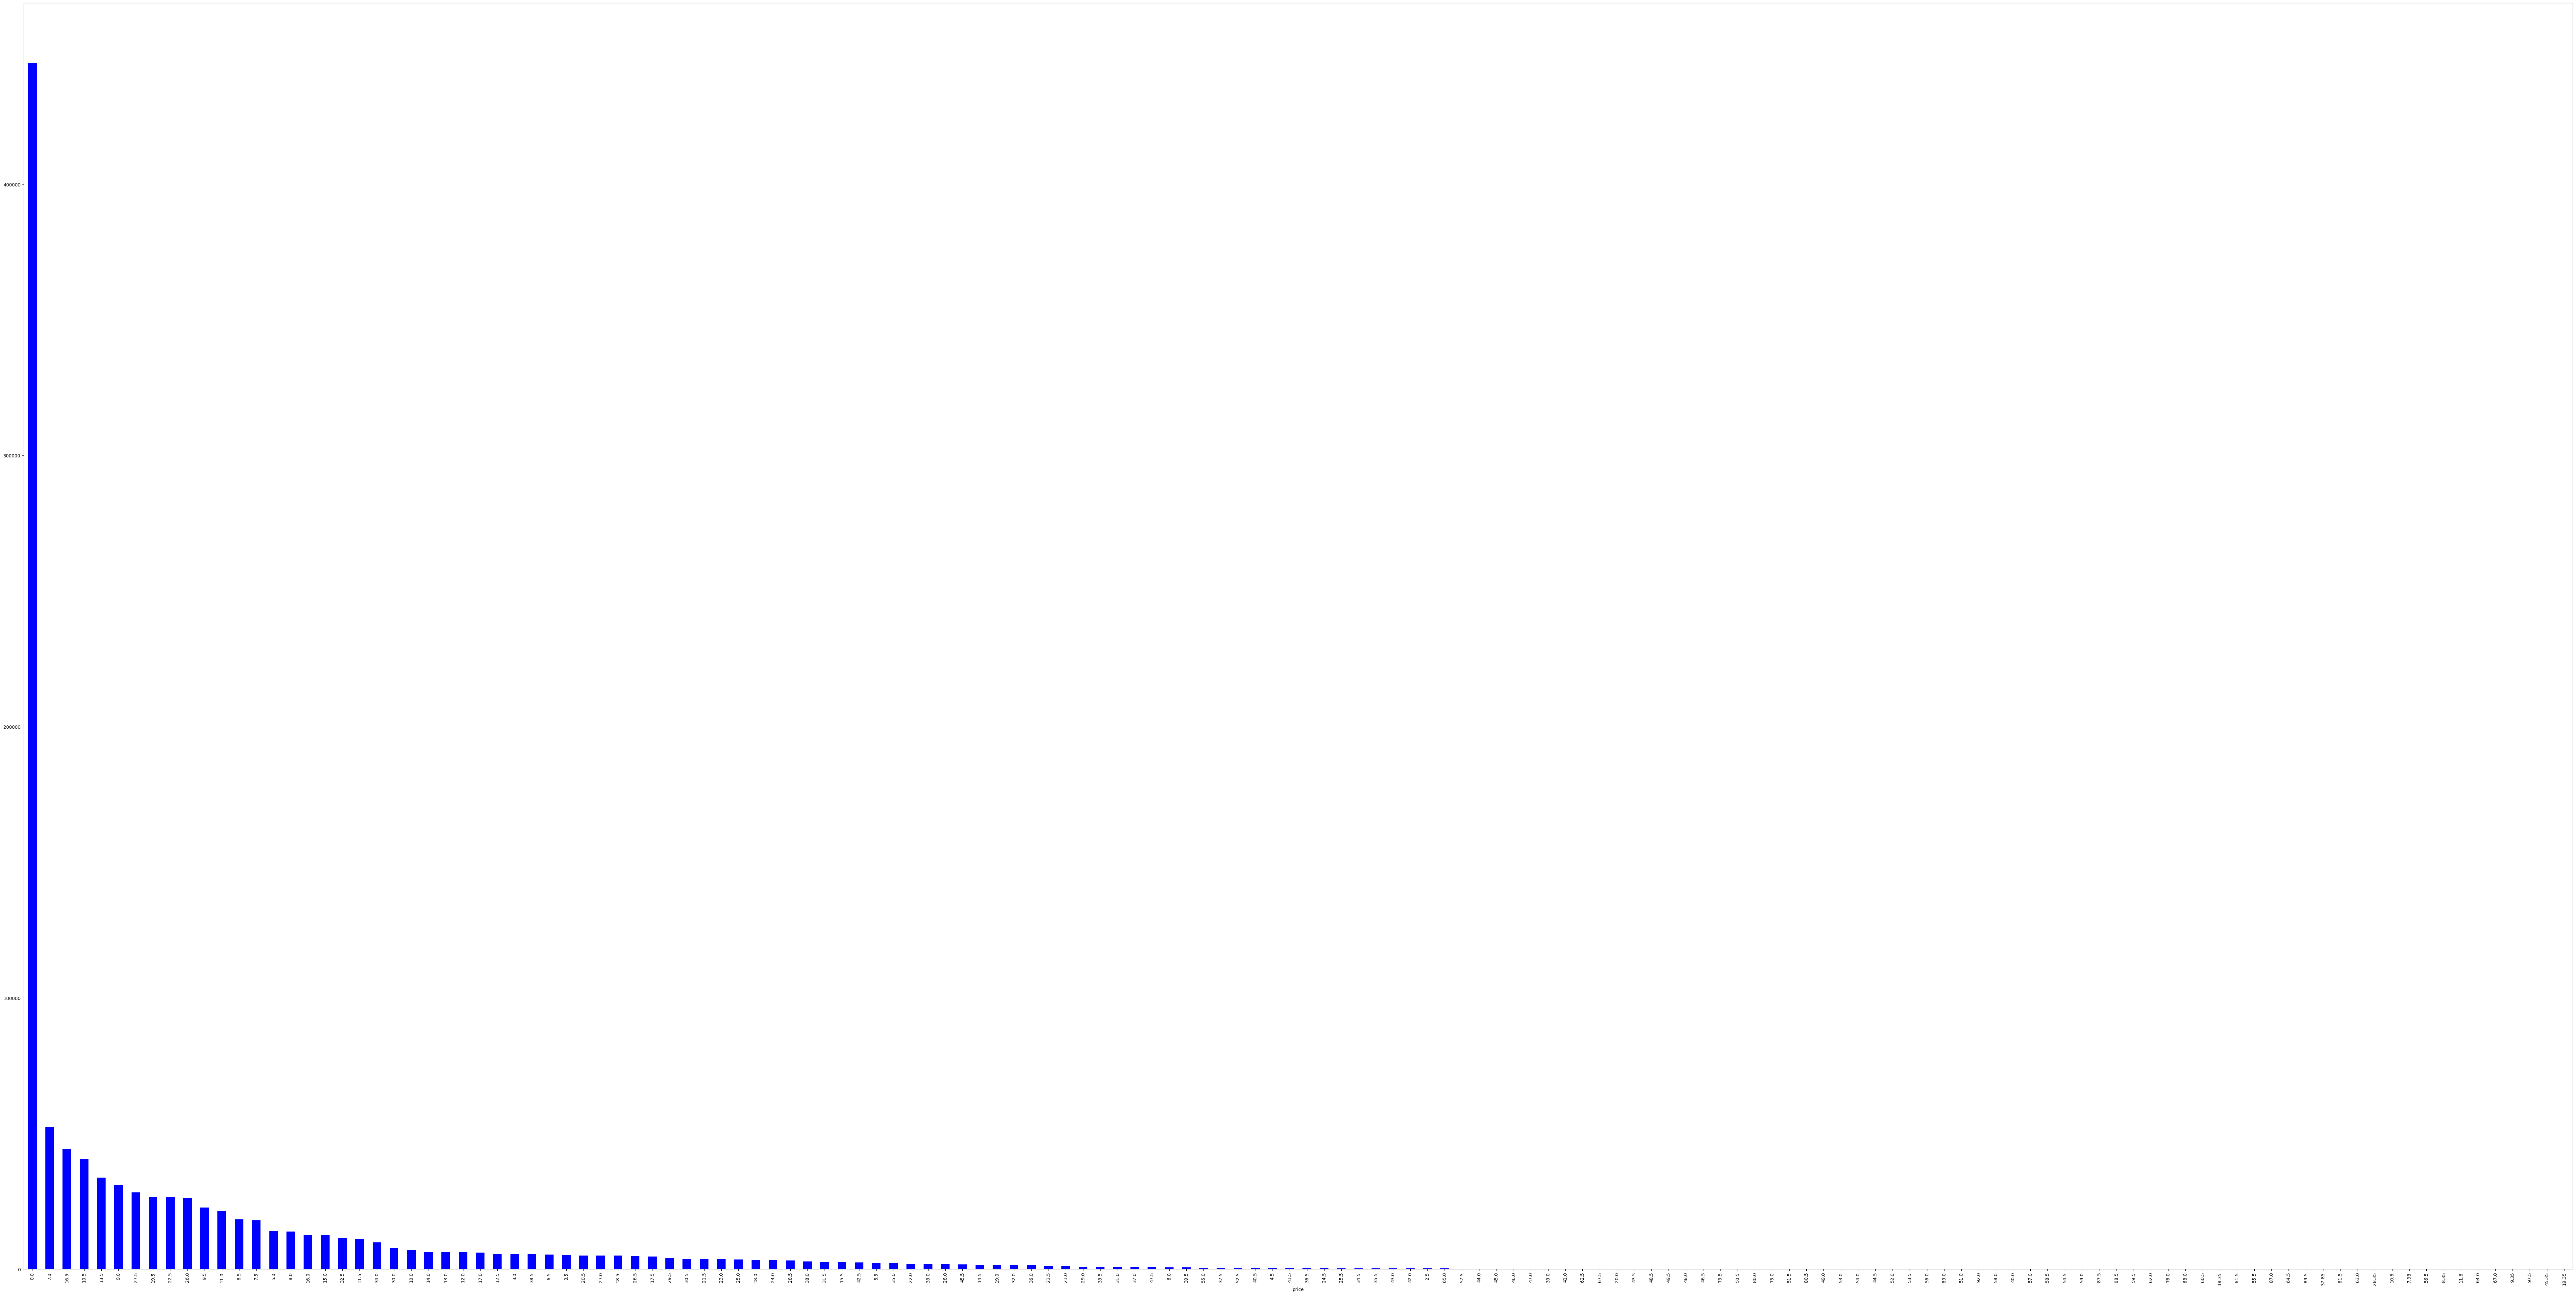

In [35]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color="blue")

<Axes: xlabel='hour'>

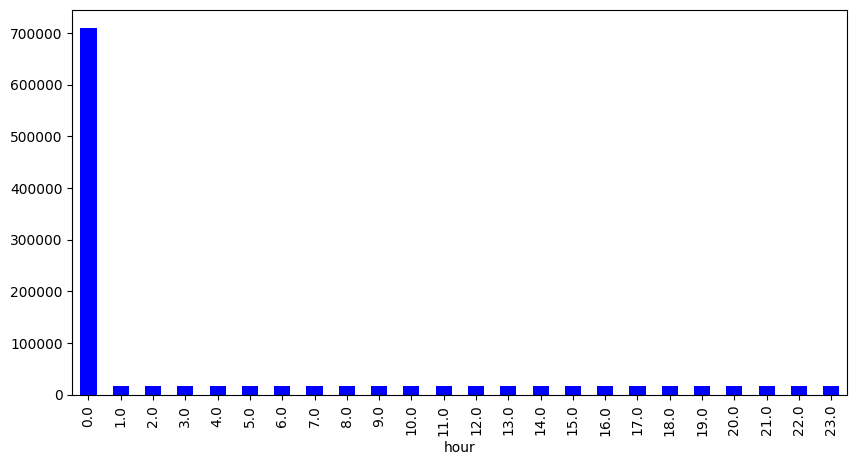

In [36]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

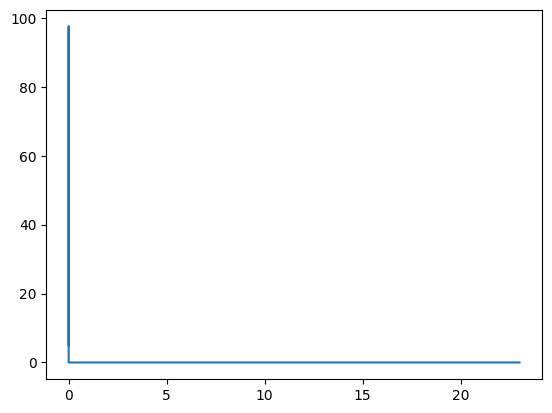

In [38]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

In [42]:
x1=a[['distance','temperature','relative_humidity','day','hour','surge_multiplier']]
y1=a['price']

In [53]:
from sklearn.model_selection import train_test_split
x_train ,y_train , x_test , y_test = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [54]:
linear = LinearRegression()
linear.fit(x_train,x_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
predictions=linear.predict(y_train)

In [58]:
predictions

array([ 0.92378004, 11.93043716, 16.14881705, ..., 17.0807847 ,
       12.44547191, 15.65830776], shape=(270642,))

In [57]:
df=pd.DataFrame({'Actual':y_test,'Predicted': predictions})
df

,Actual,Predicted
48761,0.0,0.923780
360669,27.5,11.930437
573976,16.5,16.148817
233683,27.5,11.170148
100667,0.0,1.130521
...,...,...
87429,0.0,-0.858498
62457,19.5,16.345021
562121,0.0,17.080785
238301,7.0,12.445472
